<a href="https://colab.research.google.com/github/OrtegaJulio7/SIS420/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement learning (Aprendizaje por refuerzo)

El aprendizaje por refuerzo (RL) es una técnica de machine learning (ML) que entrena al software para que tome decisiones a fin de lograr los mejores resultados. Imita el proceso de aprendizaje por ensayo y error que los humanos utilizan para lograr sus objetivos.
<HR>
 <h3>
  NOMBRE:
  * ORTEGA ALBARADO JULIO CESAR<br>
  
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  
  * [Enlace al git hub](https://github.com/OrtegaJulio7/SIS420/blob/main/Final.ipynb)

 <h3>

# Descripcion del proyecto:
Se implemento un modelo de aprendizaje por refuerzo con Q-Learning para entrenar a un tutor educativo que guía a estudiantes a través de diferentes niveles de aprendizaje (principiante, intermedio y avanzado).

# **TUTOR INTELIGENTE**


1.   **Elementos del entorno**

  1.   Agente: Tutor virtual que recomienda actividades.
  2.   Estados (𝑠): Nivel de conocimiento del estudiante.

      *   Por ejemplo: 𝑠 ∈ { principiante, intermedio, avanzado }

  3.   Acciones (𝑎): Actividades o recursos que el tutor puede recomendar.

       *   Ejemplo: 𝑎 ∈ { lectura, ejerccicio, video }

  4.   Recompensa (𝑟): Feedback del desempeño del estudiante
      
      1.   Recompensas diferenciadas:
            *   Alta recompensa (+2) para acciones correctas en estados avanzados, ya que estas tareas suelen ser más difíciles
            *   Recompensa moderada (+1) para acciones correctas en estados intermedios o principiantes.
            *   Penalización leve (−1) para acciones incorrectas en estados iniciales.
            *   Penalización severa (−2) para acciones incorrectas en estados avanzados, porque se espera un mejor desempeño.
      2.   Sistema de faltas:
            *   Cada vez que el estudiante realice una acción incorrecta, acumula faltas (+1).
            *   Si las faltas superan un límite (por ejemplo, 3 faltas consecutivas), el estudiante "retrocede" un nivel (por ejemplo, de avanzado a intermedio).
            
      3.   Progreso restringido:
            * Si el estudiante acumula muchas faltas, su progreso se detiene o se revierte.

 5.   Meta: Maximizar el nivel de conocimiento del estudiante en el menor tiempo posible.

2.   **Algoritmo Q-Learning**

  El tutor ajustará una tabla 𝑄(𝑠,𝑎)que representará el valor esperado de recomendar cada acción en un estado dado.

Entrenando al tutor


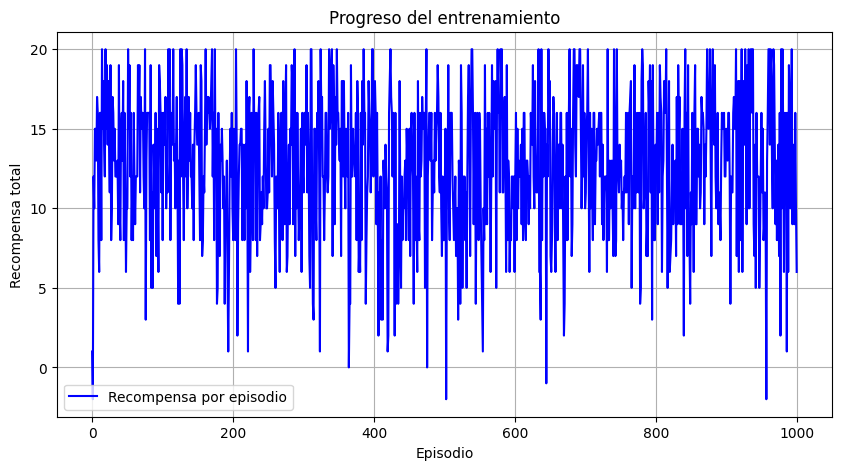


Tabla Q entrenada:
principiante: [15.8495242  14.20384517 13.70058368]
intermedio: [15.4471082  18.0002448  15.96494828]
avanzado: [15.87453005 16.         20.        ]


In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definir los estados y las acciones posibles del estudiante
states = ["principiante", "intermedio", "avanzado"]  # Los niveles de progreso del estudiante
actions = ["lectura", "ejercicio", "video"]  # Acciones que el tutor puede sugerir
state_to_index = {state: idx for idx, state in enumerate(states)}  # Mapea cada estado a un índice numérico
action_to_index = {action: idx for idx, action in enumerate(actions)}  # Mapea cada acción a un índice numérico

# Parámetros de Q-Learning
q_table = np.zeros((len(states), len(actions)))  # Inicializa la tabla Q con ceros, de tamaño (estados x acciones)
alpha = 0.1  # Tasa de aprendizaje: cuánto ajusta la tabla Q después de cada actualización
gamma = 0.9  # Factor de descuento: valora las recompensas futuras en comparación con las inmediatas
epsilon = 0.2  # Probabilidad de explorar: controla la estrategia epsilon-greedy (exploración vs. explotación)

# Sistema de faltas
fault_limit = 3  # Número máximo de faltas consecutivas antes de que el estudiante retroceda de nivel

# Función de recompensas diferenciadas
def get_reward_and_faults(state, action, consecutive_faults):
    """
    Calcula la recompensa y actualiza el contador de faltas basándose en
    el estado actual y la acción tomada.
    Parámetros:
        state (str): Estado actual del estudiante.
        action (str): Acción tomada por el tutor.
        consecutive_faults (int): Número de faltas consecutivas.
    Retorna:
        reward (int): Recompensa obtenida.
        updated_faults (int): Nuevo conteo de faltas consecutivas.
    """
    if state == "principiante" and action == "lectura":
        return 1, 0  # Acción correcta en estado principiante
    elif state == "intermedio" and action == "ejercicio":
        return 1, 0  # Acción correcta en estado intermedio
    elif state == "avanzado" and action == "video":
        return 2, 0  # Mayor recompensa para la acción correcta en estado avanzado
    else:
        # Penalizaciones para acciones incorrectas
        if state == "avanzado":
            return -2, consecutive_faults + 1  # Penalización más severa en estado avanzado
        else:
            return -1, consecutive_faults + 1  # Penalización en otros estados

# Progreso del estudiante
def next_state_simulation(state, consecutive_faults):
    """
    Simula el cambio de estado del estudiante dependiendo de su desempeño.
    Parámetros:
        state (str): Estado actual del estudiante.
        consecutive_faults (int): Número de faltas consecutivas.
    Retorna:
        next_state (str): Estado siguiente del estudiante.
        updated_faults (int): Nuevo conteo de faltas consecutivas.
    """
    if consecutive_faults >= fault_limit:
        # Retroceso de nivel si las faltas alcanzan el límite
        if state == "avanzado":
            return "intermedio", 0  # Retrocede de avanzado a intermedio
        elif state == "intermedio":
            return "principiante", 0  # Retrocede de intermedio a principiante
        else:
            return "principiante", 0  # No puede retroceder más allá de principiante

    # Simulación de progreso normal basado en probabilidades
    if state == "principiante":
        return random.choices(["principiante", "intermedio"], [0.7, 0.3])[0], consecutive_faults
    elif state == "intermedio":
        return random.choices(["intermedio", "avanzado"], [0.6, 0.4])[0], consecutive_faults
    else:
        return "avanzado", consecutive_faults  # En avanzado no progresa más allá de avanzado

# Entrenamiento del tutor
def train_tutor(episodes=1000, steps_per_episode=10):
    """
    Entrena al tutor mediante aprendizaje por refuerzo utilizando Q-Learning.
    Parámetros:
        episodes (int): Número de episodios de entrenamiento.
        steps_per_episode (int): Número de pasos por episodio.
    Retorna:
        rewards_per_episode (list): Recompensas acumuladas por episodio.
    """
    rewards_per_episode = []  # Lista para almacenar las recompensas acumuladas en cada episodio
    for _ in range(episodes):
        state = random.choice(states)  # Seleccionar un estado inicial aleatorio
        consecutive_faults = 0  # Inicializar las faltas consecutivas en 0
        total_reward = 0  # Recompensa total acumulada en el episodio
        for _ in range(steps_per_episode):
            state_idx = state_to_index[state]  # Obtener el índice del estado actual
            if random.uniform(0, 1) < epsilon:
                action = random.choice(actions)  # Exploración: elige una acción aleatoria
            else:
                action = actions[np.argmax(q_table[state_idx])]  # Explotación: elige la mejor acción según la tabla Q
            action_idx = action_to_index[action]  # Obtener el índice de la acción seleccionada

            # Obtener la recompensa y actualizar las faltas
            reward, consecutive_faults = get_reward_and_faults(state, action, consecutive_faults)

            # Determinar el siguiente estado y actualizar el contador de faltas
            next_state, consecutive_faults = next_state_simulation(state, consecutive_faults)
            next_state_idx = state_to_index[next_state]  # Índice del siguiente estado

            # Actualizar la tabla Q utilizando la fórmula de Q-learning
            q_table[state_idx, action_idx] += alpha * (
                reward + gamma * np.max(q_table[next_state_idx]) - q_table[state_idx, action_idx]
            )

            # Actualizar el estado actual al siguiente estado
            state = next_state

            # Acumular la recompensa obtenida
            total_reward += reward

        # Agregar la recompensa total del episodio a la lista
        rewards_per_episode.append(total_reward)

    return rewards_per_episode  # Retornar las recompensas acumuladas por episodio



# Entrenar al tutor
print("Entrenando al tutor")
rewards_training = train_tutor()

# Visualizar el progreso del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(rewards_training, label="Recompensa por episodio", color="blue")
plt.title("Progreso del entrenamiento")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.legend()
plt.grid()
plt.show()
# # Entrenar al tutor
# print("Entrenando al tutor...")
# train_tutor()

# Mostrar la tabla Q entrenada
print("\nTabla Q entrenada:")
for state, row in zip(states, q_table):
    print(f"{state}: {row}")

In [15]:
# Prueba del tutor ya entrenado
def test_tutor(num_students=100, steps_per_student=10):
    """
    Evalúa el rendimiento del tutor entrenado interactuando con múltiples estudiantes.
    Parámetros:
        num_students (int): Número de estudiantes a simular.
        steps_per_student (int): Número de pasos de interacción por estudiante.
    """
    total_reward = 0  # Variable para acumular la recompensa total obtenida durante la prueba

    for student in range(num_students):  # Iterar sobre el número de estudiantes simulados
        print(f"\nEstudiante {student + 1}:")  # Indicar el estudiante actual
        state = random.choice(states)  # Seleccionar un estado inicial aleatorio para el estudiante
        consecutive_faults = 0  # Inicializar el contador de faltas consecutivas en 0

        for step in range(steps_per_student):  # Iterar sobre los pasos para cada estudiante
            state_idx = state_to_index[state]  # Obtener el índice del estado actual
            action_idx = np.argmax(q_table[state_idx])  # Seleccionar la mejor acción según la tabla Q entrenada
            action = actions[action_idx]  # Obtener la acción correspondiente al índice seleccionado

            # Obtener la recompensa y actualizar el contador de faltas
            reward, consecutive_faults = get_reward_and_faults(state, action, consecutive_faults)
            total_reward += reward  # Acumular la recompensa obtenida en este paso

            # Mostrar resultados de este paso
            print(f"  Estado: {state}, Acción: {action}, Recompensa: {reward}, Faltas: {consecutive_faults}")

            # Determinar el siguiente estado y actualizar el contador de faltas
            state, consecutive_faults = next_state_simulation(state, consecutive_faults)

    # Mostrar la recompensa total obtenida durante toda la prueba
    print(f"\nRecompensa total obtenida en la prueba: {total_reward}")

# Probar el tutor ya entrenado
print("\nProbando al tutor...")
test_tutor()  # Llamar a la función de prueba con los parámetros por defecto



Probando al tutor...

Estudiante 1:
  Estado: principiante, Acción: lectura, Recompensa: 1, Faltas: 0
  Estado: intermedio, Acción: ejercicio, Recompensa: 1, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0

Estudiante 2:
  Estado: principiante, Acción: lectura, Recompensa: 1, Faltas: 0
  Estado: principiante, Acción: lectura, Recompensa: 1, Faltas: 0
  Estado: intermedio, Acción: ejercicio, Recompensa: 1, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado, Acción: video, Recompensa: 2, Faltas: 0
  Estado: avanzado

Este bloque simula cómo el tutor entrenado interactuaría con un conjunto de estudiantes. Evalúa las decisiones tomadas basándose en la tabla Q previamente optimizada, mostrando la efectividad del tutor y cuantificando su desempeño a través de la recompensa acumulada. Este método permite validar si el tutor entrenado puede guiar adecuadamente a los estudiantes hacia el aprendizaje esperado en un entorno simulado